<a href="https://colab.research.google.com/github/angelomaia/alura-cursos/blob/master/Forma%C3%A7%C3%A3o%20Machine%20Learning/Otimiza%C3%A7%C3%A3o_de_hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados aleatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [8]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [9]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


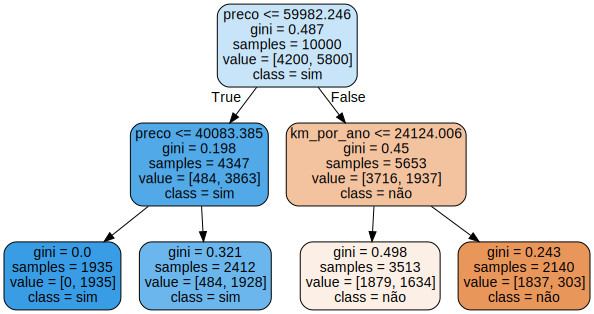

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, 
                           rounded=True, class_names=['não','sim'], 
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


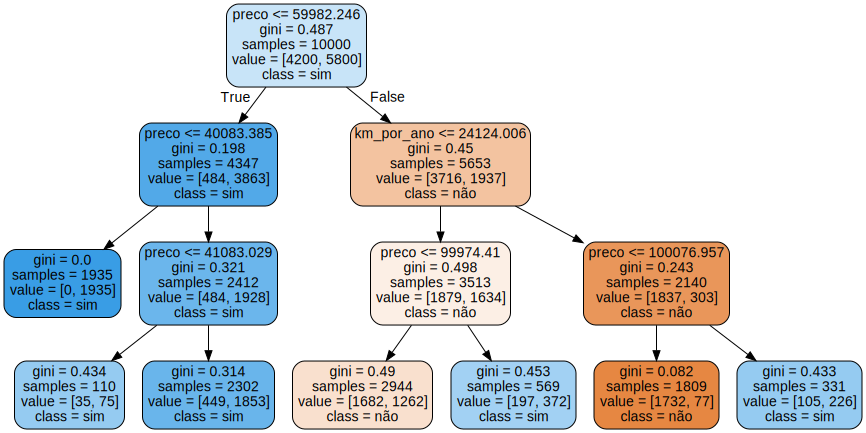

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, 
                           rounded=True, class_names=['não','sim'], 
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Testando parâmetros

In [13]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

In [14]:
for i in range(1,33):
  roda_arvore_de_decisao(i)

Arvore max_depth = 1, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 3, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 4, media de treino = 78.79, media de teste = 78.63
Arvore max_depth = 5, media de treino = 78.94, media de teste = 78.56
Arvore max_depth = 6, media de treino = 79.17, media de teste = 78.12
Arvore max_depth = 7, media de treino = 79.50, media de teste = 77.96
Arvore max_depth = 8, media de treino = 79.89, media de teste = 77.86
Arvore max_depth = 9, media de treino = 80.46, media de teste = 77.38
Arvore max_depth = 10, media de treino = 81.16, media de teste = 77.19
Arvore max_depth = 11, media de treino = 82.03, media de teste = 76.97
Arvore max_depth = 12, media de treino = 82.89, media de teste = 76.49
Arvore max_depth = 13, media de treino = 83.95, media de teste = 75.81
Arvore max_depth = 14, media de treino = 85.03, media de teste = 75.66
Arvore max_dept

In [15]:
resultados = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth','train','test'])

resultados.head()

Arvore max_depth = 1, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 3, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 4, media de treino = 78.79, media de teste = 78.63
Arvore max_depth = 5, media de treino = 78.94, media de teste = 78.56
Arvore max_depth = 6, media de treino = 79.17, media de teste = 78.12
Arvore max_depth = 7, media de treino = 79.50, media de teste = 77.96
Arvore max_depth = 8, media de treino = 79.89, media de teste = 77.86
Arvore max_depth = 9, media de treino = 80.46, media de teste = 77.38
Arvore max_depth = 10, media de treino = 81.16, media de teste = 77.19
Arvore max_depth = 11, media de treino = 82.03, media de teste = 76.97
Arvore max_depth = 12, media de treino = 82.89, media de teste = 76.49
Arvore max_depth = 13, media de treino = 83.95, media de teste = 75.81
Arvore max_depth = 14, media de treino = 85.03, media de teste = 75.66
Arvore max_dept

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='train'>

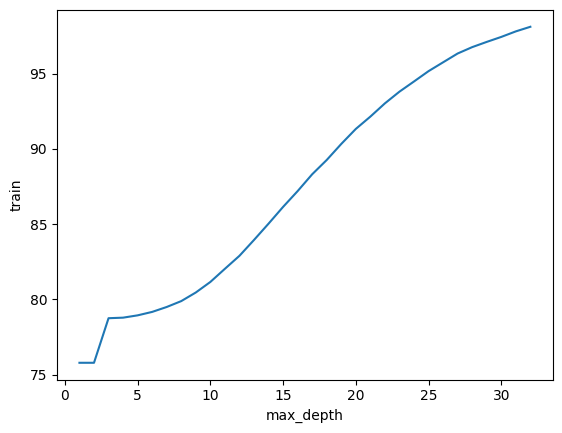

In [16]:
import seaborn as sns

sns.lineplot(x = 'max_depth', y = 'train', data = resultados)

## Overfitting (bom para o treino e ruim para o teste)

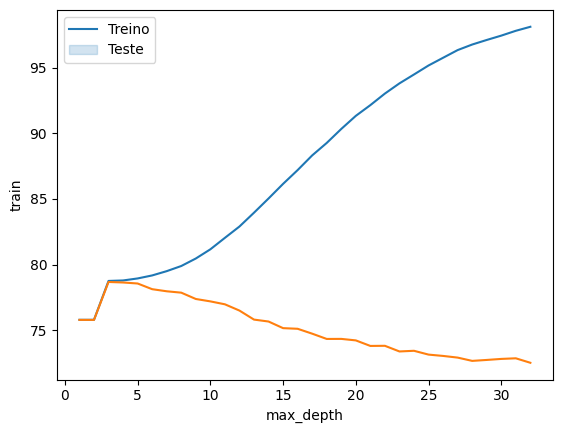

In [17]:
import matplotlib.pyplot as plt

sns.lineplot(x = 'max_depth', y = 'train', data = resultados)
sns.lineplot(x = 'max_depth', y = 'test', data = resultados)
plt.legend(['Treino','Teste'])

In [18]:
resultados.sort_values('test',ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


## Explorando duas dimensões de parâmetros

In [19]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

In [20]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32,64,128,256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train','test'])
  return resultados

resultados = busca()

resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, media de treino = 78

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [21]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [22]:
resultados.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


<Axes: >

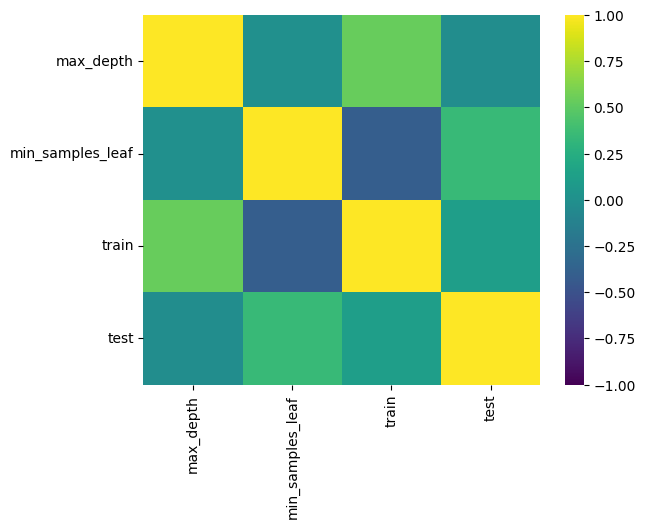

In [23]:
sns.heatmap(data=resultados.corr(), vmin=-1, cmap='viridis')

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

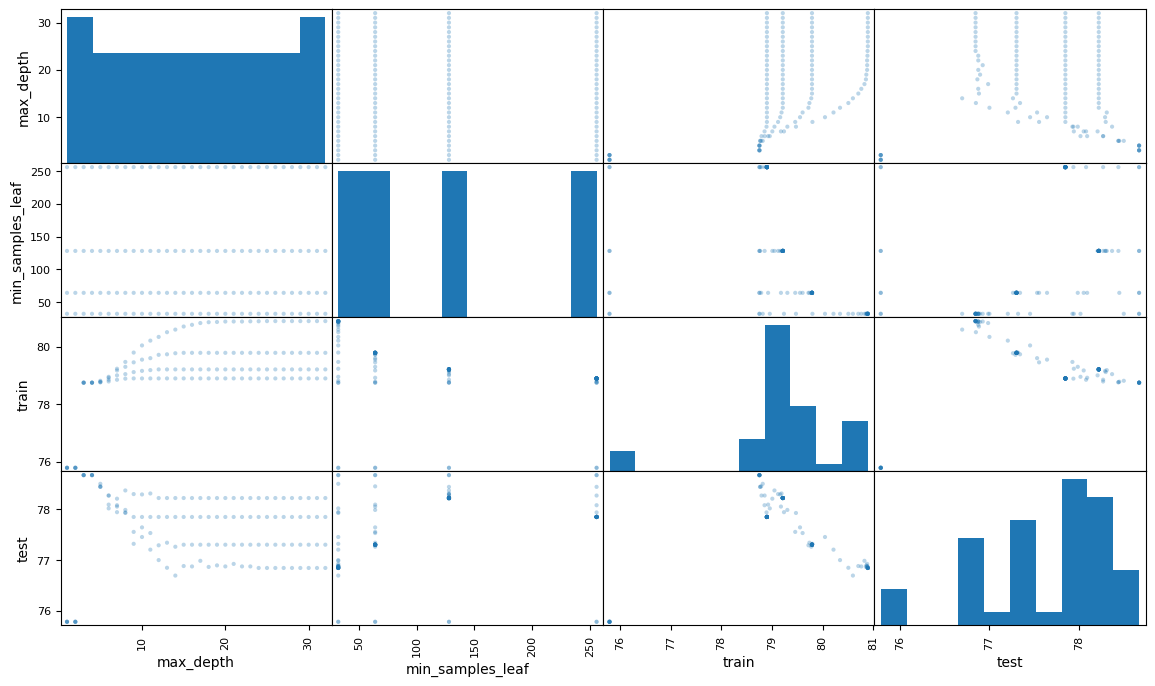

In [24]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8),alpha=0.3)

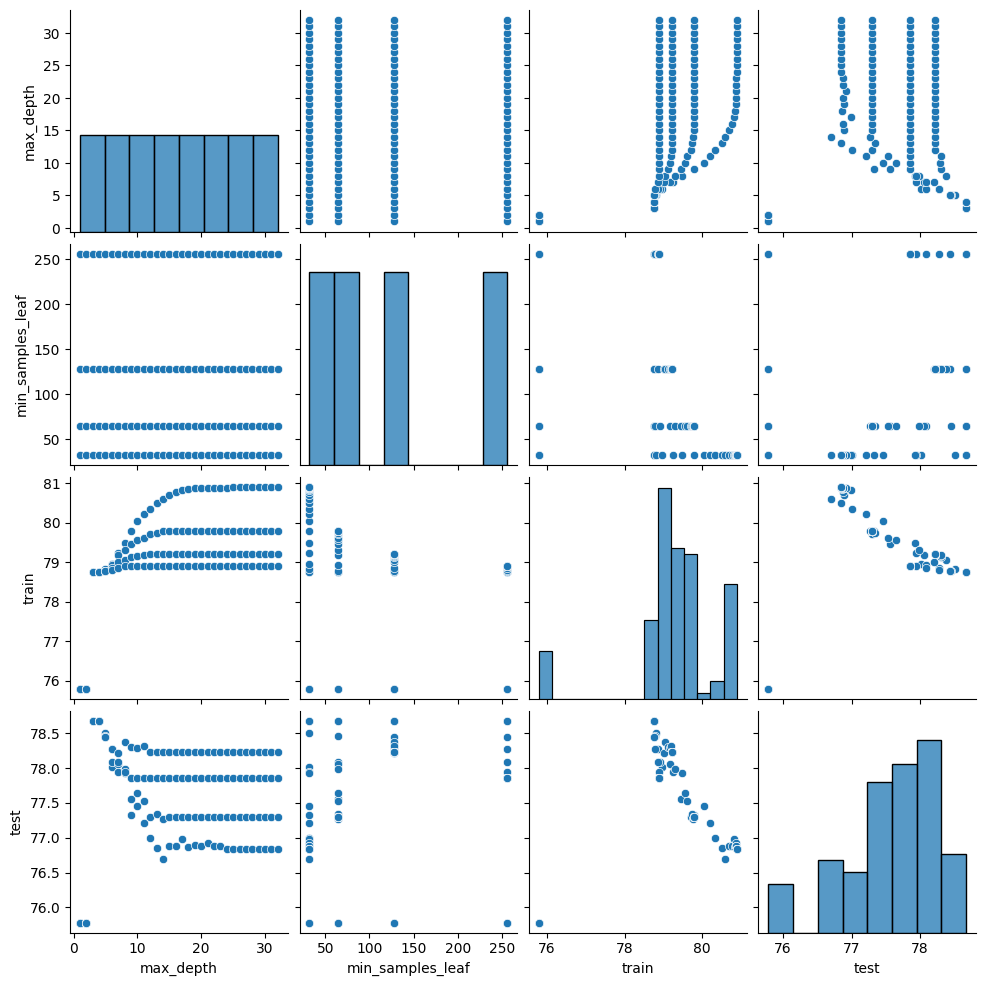

In [25]:
sns.pairplot(resultados)

In [26]:
corr = resultados.corr()

<ipython-input-27-db34b24cd1a1>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

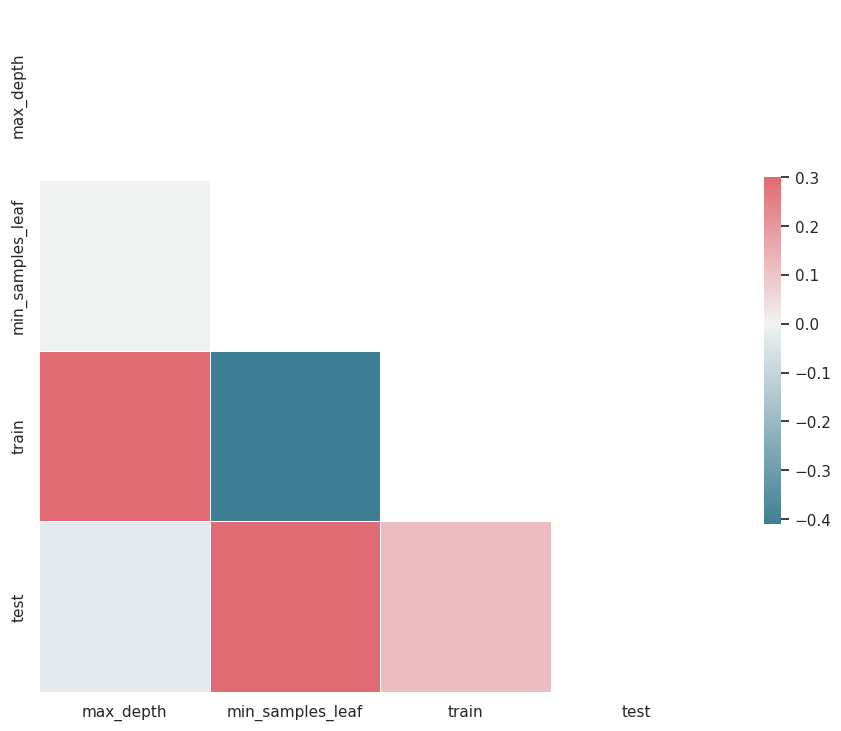

In [27]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128,192,256,512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train','test'])
  return resultados

resultados = busca()

resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 512, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 192, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 512, media de treino = 75.79, media de teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 128, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 192, media de treino = 78.75, media de teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, media de trein

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


<ipython-input-29-6f9d47881082>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

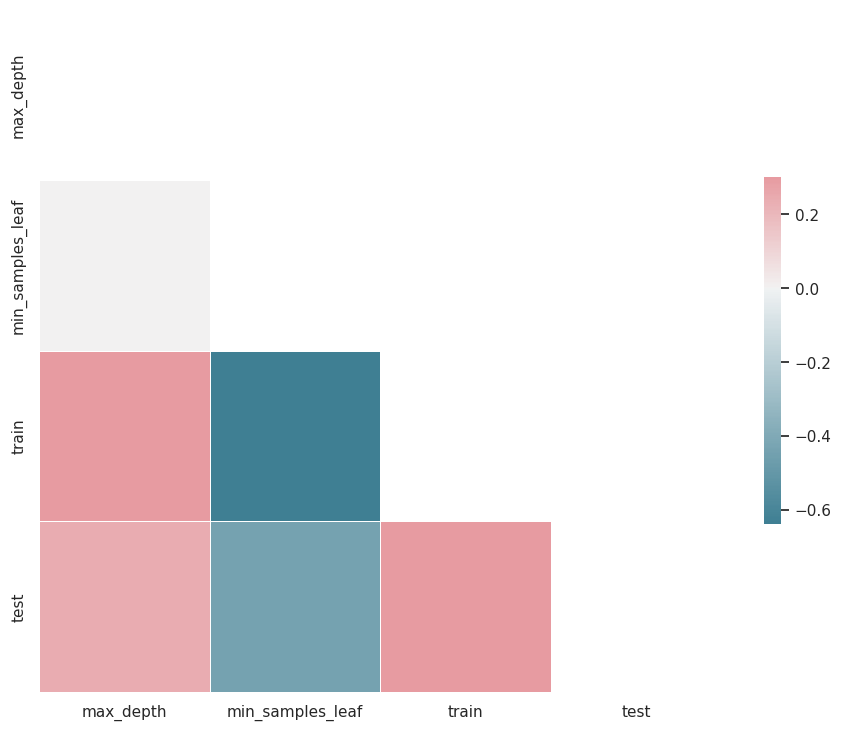

In [29]:
corr = resultados.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


## Explorando espaço de 3 hiperparâmetros

In [31]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  #print("Arvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, media de treino = %.2f, media de teste = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela
  
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128,192,256,512]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','min_samples_split','train','test', 'fit_time', 'score_time'])
  return resultados

resultados = busca()

resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.006220,0.002046
1,1,128,64,75.791169,75.784219,0.005861,0.001915
2,1,128,128,75.791169,75.784219,0.006094,0.001952
3,1,128,256,75.791169,75.784219,0.006097,0.001774
4,1,192,32,75.791169,75.784219,0.005616,0.001706


<ipython-input-32-6f9d47881082>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

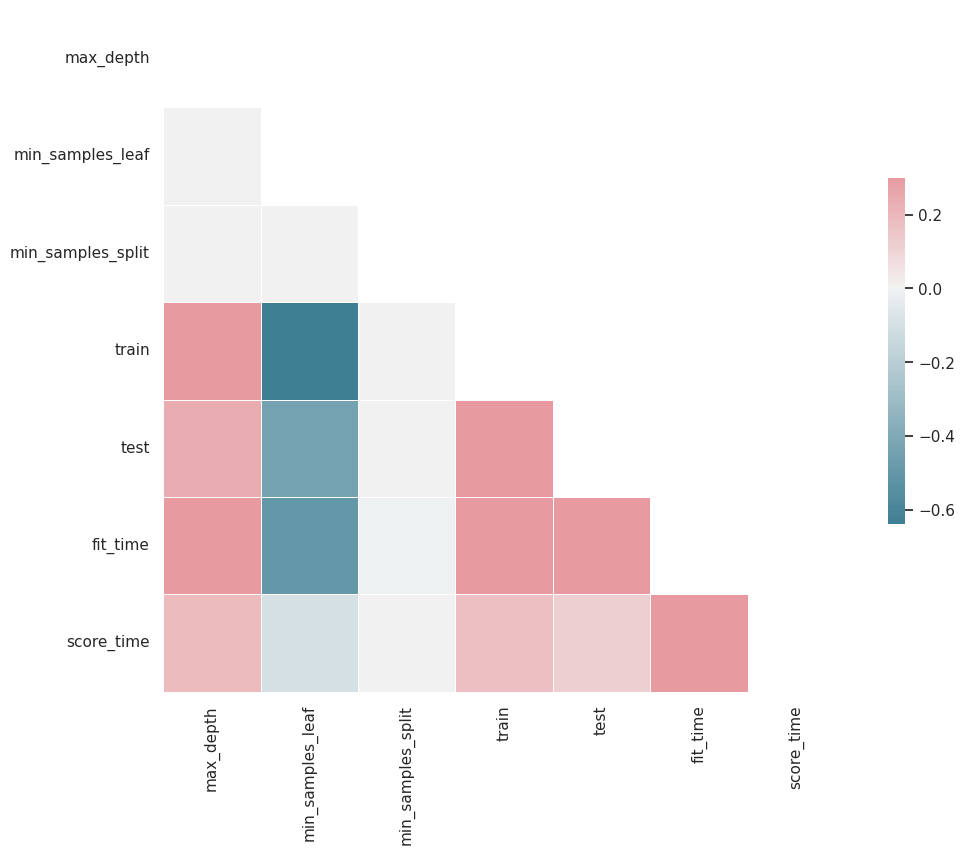

In [32]:
corr = resultados.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
resultados.sort_values('test',ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
54,4,192,128,78.750993,78.672633,0.013160,0.002358
55,4,192,256,78.750993,78.672633,0.012442,0.002043
32,3,128,32,78.750993,78.672633,0.010603,0.001846
33,3,128,64,78.750993,78.672633,0.010935,0.001923
34,3,128,128,78.750993,78.672633,0.010897,0.001986


## Utilizando GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "criterion" : ["gini","entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = GroupKFold(n_splits=10))

busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011347,0.000910,0.002247,0.000057,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011550,0.000878,0.002423,0.000453,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.012335,0.001629,0.002472,0.000512,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011063,0.000631,0.002099,0.000113,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011166,0.000728,0.002212,0.000197,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [35]:
print(busca.best_params_)
print(busca.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
0.7867263337284333


In [36]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [37]:
from sklearn.metrics import accuracy_score 

# evitar essa abordagem pois estará sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar)
print("Accuracy para os dados foi de %.2f" % (accuracy*100))

Accuracy para os dados foi de 78.75


## Como ter uma estimativa sem o vício nos dados já vistos?
### No caso de cross-validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross-validation

In [38]:
#from sklearn.model_selection import cross_val_score

# cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)
### Nested-validation com GroupKFold dá um bug ainda não resolvido desde 2016 (abril 2023)

In [39]:
from sklearn.model_selection import GridSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "criterion" : ["gini","entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits=10, shuffle=True))

busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012120,0.001102,0.002530,0.000536,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.011281,0.000517,0.002327,0.000405,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.011211,0.000434,0.002191,0.000102,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.011015,0.000212,0.002270,0.000164,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.011473,0.000831,0.002325,0.000306,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1


In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=10, shuffle=True))
scores

array([0.772, 0.768, 0.795, 0.785, 0.789, 0.786, 0.796, 0.773, 0.813,
       0.792])

In [41]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [42]:
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.13, 81.25]


## Plotando melhor estimador

In [43]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

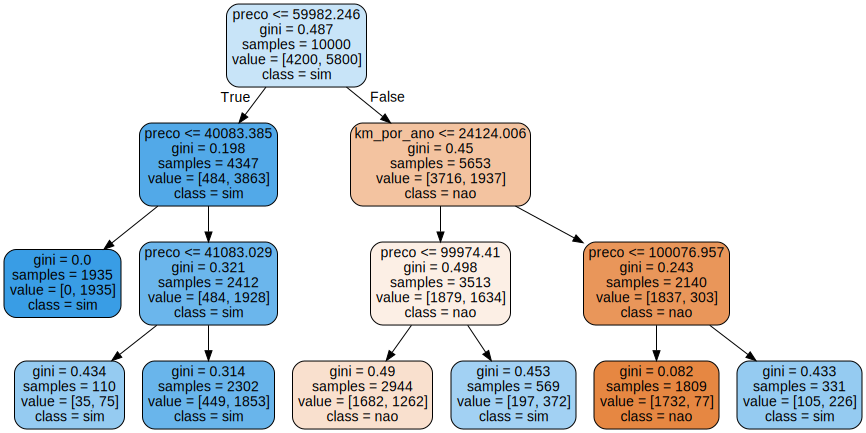

In [44]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, 
                           rounded=True, class_names=['nao','sim'], 
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Busca aleatória (RandomizedSearchCV)

In [45]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "criterion" : ["gini","entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                           espaco_de_parametros, 
                           n_iter = 16,
                           cv = KFold(n_splits=10, shuffle=True),
                           random_state = SEED)

busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021936,0.001397,0.003425,0.000321,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.767,...,0.775,0.807,0.792,0.796,0.79,0.769,0.779,0.7854,0.013032,7
1,0.015416,0.000396,0.003167,0.000475,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
2,0.015345,0.000501,0.003270,0.000446,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
3,0.019495,0.002479,0.002500,0.000531,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10
4,0.019276,0.001149,0.002346,0.000259,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10


In [46]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=10, shuffle=True))
scores
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.18, 81.20]


In [47]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

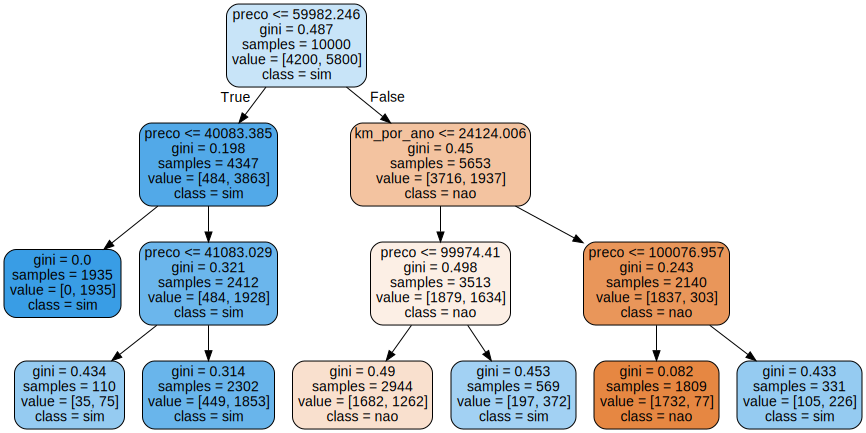

In [48]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, 
                           rounded=True, class_names=['nao','sim'], 
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

### Customizando espaço de hiperparâmetros

In [49]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini","entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                           espaco_de_parametros, 
                           n_iter = 16,
                           cv = KFold(n_splits=10, shuffle=True),
                           random_state = SEED)

busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013688,0.001585,0.002421,0.000448,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.767,...,0.774,0.813,0.792,0.796,0.790,0.780,0.779,0.7870,0.013229,1
1,0.021750,0.002119,0.002452,0.000302,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.762,...,0.769,0.807,0.796,0.792,0.780,0.773,0.768,0.7787,0.014416,10
2,0.019507,0.000892,0.002389,0.000233,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.767,...,0.769,0.805,0.795,0.794,0.785,0.771,0.776,0.7826,0.012643,5
3,0.024615,0.002125,0.002584,0.000392,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,...,0.771,0.805,0.795,0.785,0.779,0.767,0.755,0.7745,0.015750,16
4,0.020058,0.001320,0.002695,0.000766,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.767,...,0.769,0.799,0.795,0.794,0.785,0.768,0.776,0.7819,0.011836,6


In [50]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=10, shuffle=True))
scores
imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.18, 81.20]


In [51]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)

In [52]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785 +-(0.026) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.785 +-(0.026) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.783 +-(0.025) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.783 +-(0.025) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.782 +-(0.024) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.781 +-(0.023) {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.781 +-(0.026) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.024) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 88, 'min_samples_split': 78}
0.779 +-(0.029) {'criterion': 'gini', 'max_depth': 1

### Exploração mais a fundo

In [53]:
from scipy.stats import randint

SEED=255
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini","entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                           espaco_de_parametros, 
                           n_iter = 64,
                           cv = KFold(n_splits=10, shuffle=True),
                           random_state = SEED)

busca.fit(x_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018649,0.001393,0.002533,0.000451,entropy,5,127,37,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.787,...,0.792,0.765,0.776,0.792,0.805,0.775,0.792,0.7859,0.010663,13
1,0.013420,0.001028,0.002385,0.000382,entropy,3,53,105,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.787,...,0.792,0.765,0.776,0.792,0.805,0.775,0.792,0.7870,0.011269,1
2,0.026033,0.001252,0.002590,0.000385,gini,20,32,92,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.781,...,0.783,0.748,0.761,0.779,0.792,0.750,0.782,0.7710,0.014107,61
3,0.028044,0.001386,0.002336,0.000045,entropy,10,39,113,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.789,...,0.790,0.766,0.780,0.781,0.781,0.761,0.782,0.7793,0.008855,45
4,0.020290,0.001469,0.002441,0.000398,gini,20,113,80,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.788,...,0.783,0.763,0.784,0.787,0.783,0.766,0.785,0.7799,0.008215,41


In [54]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 107, 'min_samples_split': 94}
0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 118, 'min_samples_split': 52}
0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 101, 'min_samples_split': 32}
0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 124, 'min_samples_split': 45}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 126, 'min_samples_split': 111}
0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 38, 'min_samples_split': 84}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 92, 'min_samples_split': 58}
0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 105}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 104, 'min_samples_split': 105}
0.787 +-(0.023) {'criterion': 'gini', 'max_dep

## Comparando GridSearchCV com RandomizedSearchCV

### GridSearchCV

In [57]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "bootstrap" : [True,False],
    "criterion" : ["gini","entropy"]
}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits=10, shuffle=True))

busca.fit(x_azar, y_azar, groups=dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo: %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 587.86 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106230,0.027263,0.009224,0.002792,True,gini,3,32,32,10,...,0.755,0.762,0.734,0.795,0.750,0.765,0.734,0.7560,0.018847,142
1,0.670121,0.378911,0.024205,0.006011,True,gini,3,32,32,100,...,0.754,0.805,0.774,0.757,0.773,0.764,0.759,0.7701,0.015890,108
2,0.047315,0.001799,0.004349,0.000139,True,gini,3,32,64,10,...,0.755,0.786,0.783,0.770,0.749,0.752,0.754,0.7599,0.014976,137
3,0.432839,0.004809,0.020142,0.000798,True,gini,3,32,64,100,...,0.753,0.806,0.785,0.796,0.775,0.766,0.759,0.7754,0.017333,47
4,0.053786,0.011804,0.005136,0.001174,True,gini,3,32,128,10,...,0.772,0.760,0.782,0.779,0.775,0.748,0.765,0.7674,0.013618,117


In [58]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.784 +-(0.029) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.780 +-(0.030) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.780 +-(0.028) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 64, 'n_estimators': 10}
0.779 +-(0.030) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}


In [59]:
tic = time.time()
#scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo: %.2f segundos" % tempo_passado)

#imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo: 0.00 segundos
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=64, n_estimators=10)


### RandomizedSearchCV

In [60]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "bootstrap" : [True,False],
    "criterion" : ["gini","entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 20,
                     cv = KFold(n_splits=10, shuffle=True))

busca.fit(x_azar, y_azar, groups=dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo: %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 81.12 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.583026,0.104604,0.025053,0.004733,100,32,128,3,entropy,True,...,0.768,0.775,0.810,0.791,0.767,0.747,0.769,0.7749,0.015776,6
1,0.063145,0.003526,0.004663,0.000146,10,32,128,5,entropy,True,...,0.781,0.780,0.794,0.791,0.767,0.748,0.767,0.7748,0.013310,7
2,0.638139,0.010280,0.023213,0.004276,100,32,32,5,entropy,True,...,0.765,0.777,0.813,0.791,0.774,0.750,0.769,0.7761,0.015921,1
3,0.046107,0.001145,0.004286,0.000037,10,128,32,3,gini,True,...,0.768,0.775,0.804,0.791,0.773,0.742,0.735,0.7659,0.020569,15
4,0.060399,0.003806,0.004945,0.000785,10,64,32,3,entropy,False,...,0.783,0.771,0.796,0.751,0.768,0.747,0.768,0.7702,0.013556,13


In [61]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.032) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.029) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.033) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.027) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.775 +-(0.032) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True}


In [62]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo: %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo: 312.62 segundos
Accuracy médio 77.61
Intervalo [76.21, 79.01]
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


In [63]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "bootstrap" : [True,False],
    "criterion" : ["gini","entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 80,
                     cv = KFold(n_splits=5, shuffle=True))

busca.fit(x_azar, y_azar, groups=dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo: %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 138.87 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.466897,0.065643,0.033282,0.006751,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,38
1,0.110414,0.019712,0.009433,0.001933,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,57
2,1.304936,0.803667,0.059749,0.025660,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,22
3,0.044027,0.002359,0.005164,0.000461,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,80
4,0.067343,0.016603,0.006825,0.001887,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,73


In [64]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.781 +-(0.018) {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.779 +-(0.024) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.778 +-(0.021) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.777 +-(0.023) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.777 +-(0.025) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [65]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold (n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo: %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo: 580.40 segundos
Accuracy médio 77.58
Intervalo [74.70, 80.46]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=32, min_samples_split=64,
                       n_estimators=10)


## Se não puder usar cross-validation

In [67]:
# 0.6 treino
# 0.2 teste 
# 0.2 validacao

from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, 
                                                                            test_size=0.2, 
                                                                            shuffle=True, 
                                                                            stratify=y_azar)
print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32,64,128],
    "min_samples_leaf" : [32,64,128],
    "bootstrap" : [True,False],
    "criterion" : ["gini","entropy"]
}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25) # 25% de 0.8 = 0.2

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 80,
                     cv = split)

busca.fit(x_treino_teste, y_treino_teste, groups=dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo: %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 28.98 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.832854,0.0,0.043196,0.0,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7910,0.7910,0.0,23
1,0.094614,0.0,0.008742,0.0,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.8005,0.8005,0.0,2
2,0.976948,0.0,0.047058,0.0,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7915,0.7915,0.0,19
3,0.072109,0.0,0.007878,0.0,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7910,0.7910,0.0,23
4,0.104922,0.0,0.015354,0.0,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7765,0.7765,0.0,70


In [70]:
tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo: %.2f segundos" % tempo_passado)
scores

Tempo: 12.47 segundos


array([0.755])